目的：绘制股票价格、及其60日线均线的比较图,用均线方法做策略，
上交叉买入，下交叉卖出，
设定一个5%tolerance或者用PID方法来解决震荡过多的问题


In [23]:
#获取5日，10日，20日均线数据
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题
import pandas as pd
import tushare as ts
import talib
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib
%matplotlib inline

BenchmarkCode="000300.SH"

Code='300383'
CodeFull=Code
if Code[0]=='0' or Code[0]=='3':
    CodeFull=Code + '.SZ'
elif Code[0]=='6':
    CodeFull=Code + '.SH'

StockName1='东方雨虹'
#print(CodeFull)

startdate='20160105'
enddate = datetime.today() #开始时间结束时间，选取最近一年的数据
enddate = str(enddate)[0:10]

In [24]:
import csv
import os

#当前文件的路径
pwd = os.getcwd()
#当前文件的父路径
father_path=os.path.abspath(os.path.dirname(pwd)+os.path.sep+".")


with open(father_path + "/DataRepository/db00011.csv",newline='', encoding='UTF-8') as csv_file:
    csv_reader = csv.DictReader(csv_file) 
    dictcode={}
    dictname={}
    for row in csv_reader:
        dictcode[row['symbol']]=row['name']
        dictname[row['name']]=row['symbol']

StockName=(dictcode[Code])
CodeName=(dictname[StockName1])

if CodeName[0]=='0' or CodeName[0]=='3':
    CodeNameFull=CodeName + '.SZ'
elif CodeName[0]=='6':
    CodeNameFull=CodeName + '.SH'
    
print(StockName1 + ':' +CodeNameFull)

东方雨虹:002271.SZ


In [25]:
token='f20927201ecc20e3cea9279abacfbb1d39a9624820d9b2f94613f722'
pro=ts.pro_api(token)

In [35]:
df = ts.pro_bar(ts_code=CodeNameFull, api=None, adj='qfq', start_date=startdate, end_date=enddate)
# print(startdate)

In [36]:
stockline = [datetime.strptime(d, '%Y%m%d').date() for d in df.trade_date]

df.index = pd.to_datetime(df['trade_date'])


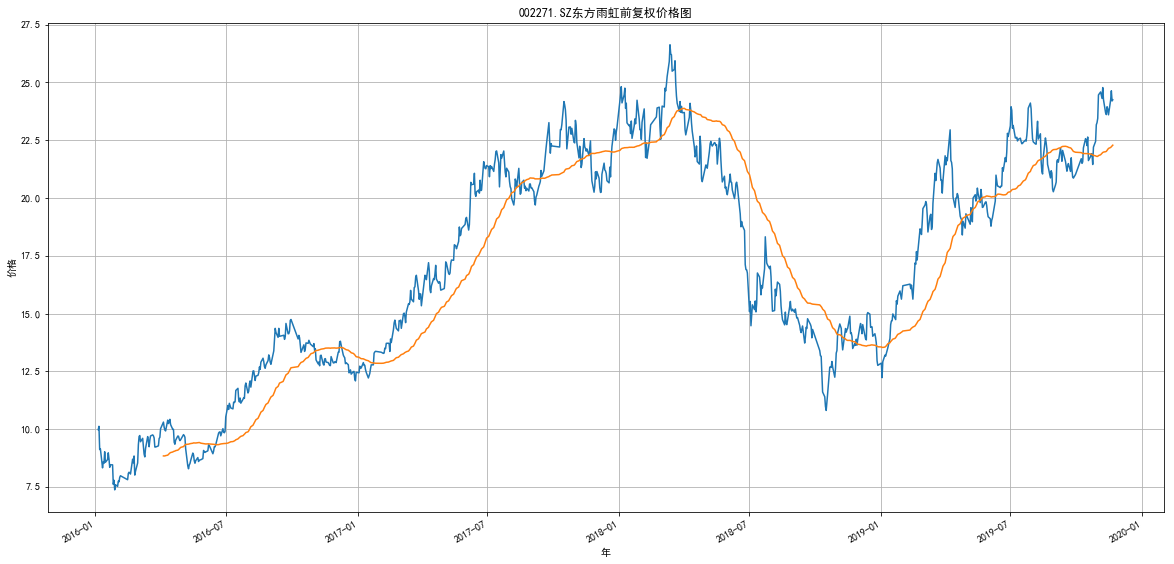

In [38]:

df['close'].plot(title=CodeNameFull +StockName1 +'前复权价格图',figsize=(20,10))
df['close'].rolling(60).mean().shift(-59).plot()

#添加网格，可有可无，只是让图像好看点
plt.grid()
#记得加这一句，不然不会显示图像
#plt.show()
plt.xlabel('年')
plt.ylabel('价格')
# print(df['close'])
# print(df['close'].rolling(60,min_periods=60).mean())
# print(df['close'])
enddateprice=df.T[df.index [0]]['close']
# print(enddateprice)
startdateprice=df.T[df.index [-1]]['close']
# print(startdateprice)
startdate=df.T[df.index [-1]]['trade_date']
# variation=(enddateprice-startdateprice)*100/startdateprice
variation=(enddateprice)*100/startdateprice
variationstring=" %.1f%%"  % variation
# print(startdate + "- " + enddate + " 涨幅:" + variationstring)